In [1]:
%matplotlib inline


In [2]:
# Practica 1 - Part 1 - Imatge hibrida en el domini del espai

# Importem les llibreries necessaries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image

# Funcio que et troba la gaussiana, segons un nombre sigma
def gaussian(sigma):
    masksize=6*sigma+1 
    Igaussian=[[masksize]*masksize for x in range(masksize)]
    x0=float(masksize)/2.0
    y0=float(masksize)/2.0
    for x in range (0, masksize):
        for y in range (0, masksize):
            # Apliquem la formula de la gaussiana pas per pas
            esquer=(((x-x0)**2)/(2*(sigma**2)))
            dret=(((y-y0)**2)/(2*(sigma**2)))
            suma=esquer+dret
            Igaussian[x][y]=math.exp(-suma)

    A=1/np.sum(Igaussian)
    print (A)
    for x in range (0, masksize):
        for y in range (0, masksize):
            Igaussian[x][y]=A*Igaussian[x][y]
            
    # Mostrem la gaussiana que anem a utilitzar
    plt.subplot(1,6,1)
    plt.imshow(Igaussian)
    return Igaussian

    
   

0.00197382668079


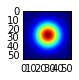

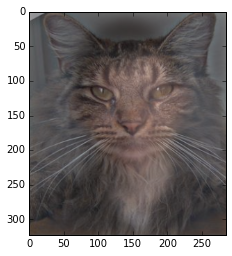

In [5]:
# Importem les llibreries necessaries
from scipy import signal
from skimage.transform import resize

# funcio que fa una iamtge hibrida segons el filtre pasa baix d'una imatge i el filtre pasa alt de l'altre imatge
def obrirImatge():
    # Passem a float
    imatgeHuman=misc.imread("human.png")/255.
    imatgeCat=misc.imread("cat.png")/255.
    
    # Escalo les imatges perque siguin del mateix tamany, el problema es que no coincideixen
    imatgeGatRe=resize(imatgeCat,(323,285), order=1, preserve_range=True)
    
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(9)
    
    # Creem les matrius per fer el filtre amb zeros
    fitrPasaBaixHuman = np.zeros((323,285,3))
    fitrPasaAltHuman = np.zeros((323,285,3))
    fitrPasaBaixGat = np.zeros((323,285,3))
    fitrPasaAltGat = np.zeros((323,285,3))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitrPasaBaixHuman[:,:,0]=signal.convolve2d(imatgeHuman[:,:,0],gauss,mode='same')
    fitrPasaBaixHuman[:,:,1]=signal.convolve2d(imatgeHuman[:,:,1],gauss,mode='same')
    fitrPasaBaixHuman[:,:,2]=signal.convolve2d(imatgeHuman[:,:,2],gauss,mode='same')
    
    fitrPasaBaixGat[:,:,0]=signal.convolve2d(imatgeGatRe[:,:,0],gauss, mode='same')
    fitrPasaBaixGat[:,:,1]=signal.convolve2d(imatgeGatRe[:,:,1],gauss, mode='same')
    fitrPasaBaixGat[:,:,2]=signal.convolve2d(imatgeGatRe[:,:,2],gauss, mode='same')
    
    # Mostrem les imatges
    #plt.figure()
    #plt.imshow(imatgeHuman)
    #plt.figure()
    #plt.imshow(fitrPasaBaixHuman)
    #plt.figure()
    #plt.imshow(imatgeCat)
    #plt.figure()
    #plt.imshow(fitrPasaBaixGat)
    
    # Fem el passa Alt del gat, restant la imatge real menys el passa baix
    fitrPasaAltGat[:,:,0]=imatgeGatRe[:,:,0]-fitrPasaBaixGat[:,:,0]
    fitrPasaAltGat[:,:,1]=imatgeGatRe[:,:,1]-fitrPasaBaixGat[:,:,1]
    fitrPasaAltGat[:,:,2]=imatgeGatRe[:,:,2]-fitrPasaBaixGat[:,:,2]
    
    # restem el minim de cada canal y el dividim entre el maxim meny el minim pero normalitzar la imatge y que no surti saturada
    fitrPasaAltGat[:,:,0] = ((fitrPasaAltGat[:,:,0] - fitrPasaAltGat[:,:,0].min()) / (fitrPasaAltGat[:,:,0].max() - fitrPasaAltGat[:,:,0].min()))
    fitrPasaAltGat[:,:,1] = ((fitrPasaAltGat[:,:,1] - fitrPasaAltGat[:,:,1].min()) / (fitrPasaAltGat[:,:,1].max() - fitrPasaAltGat[:,:,1].min()))
    fitrPasaAltGat[:,:,2] = ((fitrPasaAltGat[:,:,2] - fitrPasaAltGat[:,:,2].min()) / (fitrPasaAltGat[:,:,2].max() - fitrPasaAltGat[:,:,2].min()))
    
    #fitrPasaAltGat = fitrPasaAltGat
    # plt.figure()
    #plt.imshow(fitrPasaAltGat)
    #plt.colorbar()
    
    # Mostrem les imatges, amb el tant per cent de cada una que volem
    imatgeFinal=fitrPasaBaixHuman*0.4+fitrPasaAltGat*0.6
    plt.figure()
    plt.imshow(imatgeFinal)

obrirImatge()

In [29]:
# Practica 1 - Part 2 - Imatge hibrida en el domini de la fequencia

0.00197382668079


array([[[ 0.03490035,  0.04622125,  0.03266863],
        [ 0.03759916,  0.0499528 ,  0.03538215],
        [ 0.04023621,  0.05361268,  0.03804097],
        ..., 
        [ 0.30797957,  0.31398457,  0.31480513],
        [ 0.28712683,  0.29276213,  0.29349283],
        [ 0.26574882,  0.27099642,  0.27164443]],

       [[ 0.0384273 ,  0.05086255,  0.03568344],
        [ 0.04139746,  0.05496262,  0.03864711],
        [ 0.0442949 ,  0.0589781 ,  0.04154931],
        ..., 
        [ 0.33531098,  0.34179807,  0.3427154 ],
        [ 0.31260826,  0.31869446,  0.31951322],
        [ 0.28933354,  0.29499971,  0.29572749]],

       [[ 0.04200611,  0.05556602,  0.03868095],
        [ 0.04525288,  0.06003998,  0.04189414],
        [ 0.04841512,  0.06441541,  0.04503892],
        ..., 
        [ 0.36231102,  0.36926332,  0.37028161],
        [ 0.33778084,  0.3443018 ,  0.34521276],
        [ 0.31263246,  0.31870193,  0.31951349]],

       ..., 
       [[ 0.09828742,  0.09298651,  0.06389036],
        

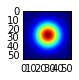

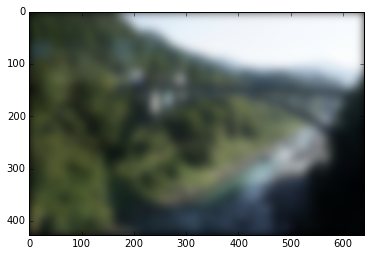

In [21]:
# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre pasa baix
def filtreLP(imagen):
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(9)
    
    # Creem les matrius per fer el filtre amb zeros
    fitr = np.zeros((427,640,3))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitr[:,:,0]=signal.convolve2d(imagen[:,:,0],gauss,mode='same')
    fitr[:,:,1]=signal.convolve2d(imagen[:,:,1],gauss,mode='same')
    fitr[:,:,2]=signal.convolve2d(imagen[:,:,2],gauss,mode='same')
    
    plt.figure()
    plt.imshow(fitr)
    
    return fitr

imatgeLP = misc.imread("paisaje.jpg")/255.
filtreLP(imatgeLP)

0.00197382668079


array([[[ 0.54201257,  0.46161902,  0.36035591],
        [ 0.5525649 ,  0.48718105,  0.37163785],
        [ 0.55794081,  0.50203652,  0.37712132],
        ..., 
        [ 0.4657847 ,  0.42408213,  0.35908039],
        [ 0.46486063,  0.42224693,  0.3594777 ],
        [ 0.4613416 ,  0.42306483,  0.35986123]],

       [[ 0.52965773,  0.48738509,  0.36873987],
        [ 0.53226971,  0.50215715,  0.37420179],
        [ 0.52970581,  0.50889656,  0.37386479],
        ..., 
        [ 0.47175459,  0.43132225,  0.37031751],
        [ 0.47097144,  0.42955657,  0.37364162],
        [ 0.47017702,  0.42776779,  0.37116049]],

       [[ 0.49149522,  0.40887074,  0.38001306],
        [ 0.47841843,  0.40483254,  0.37386429],
        [ 0.46792043,  0.40345855,  0.37060173],
        ..., 
        [ 0.45451024,  0.41719492,  0.36130264],
        [ 0.45644883,  0.41549672,  0.35886675],
        [ 0.45837535,  0.41644763,  0.35930997]],

       ..., 
       [[ 0.59283441,  0.50179295,  0.36402322],
        

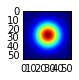

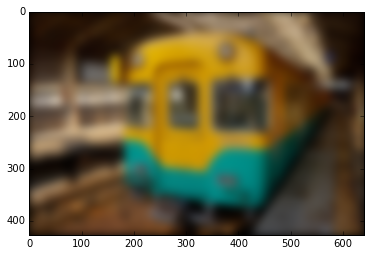

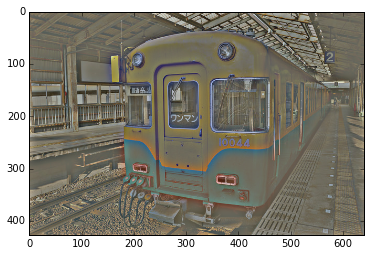

In [22]:
# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre passa alt
def filtreHP(imagen):    
    # Creem les matrius per fer el filtre amb zeros
    fitrHP = np.zeros((427,640,3))
    
    fitrLP = filtreLP(imagen)
    
    # Fem el passa Alt del gat, restant la imatge real menys el passa baix
    fitrHP[:,:,0]=imagen[:,:,0]-fitrLP[:,:,0]
    fitrHP[:,:,1]=imagen[:,:,1]-fitrLP[:,:,1]
    fitrHP[:,:,2]=imagen[:,:,2]-fitrLP[:,:,2]
    
    # restem el minim de cada canal y el dividim entre el maxim meny el minim pero normalitzar la imatge y que no surti saturada
    fitrHP[:,:,0] = ((fitrHP[:,:,0] - fitrHP[:,:,0].min()) / (fitrHP[:,:,0].max() - fitrHP[:,:,0].min()))
    fitrHP[:,:,1] = ((fitrHP[:,:,1] - fitrHP[:,:,1].min()) / (fitrHP[:,:,1].max() - fitrHP[:,:,1].min()))
    fitrHP[:,:,2] = ((fitrHP[:,:,2] - fitrHP[:,:,2].min()) / (fitrHP[:,:,2].max() - fitrHP[:,:,2].min()))
    
    
    plt.figure()
    plt.imshow(fitrHP)
    
    return fitrHP

imatgeHP = misc.imread("tren.jpg")/255.
filtreHP(imatgeHP)